# Adult Income: Who makes more than $50K?

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('adult.csv.zip')

## Explore the Data

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


At first glance, it looks like there is missing data in this dataset. There are '?' in at least the workclass and occupation columns. I am going to replace the '?' with nan and then look at missing values.

In [4]:
object_col = list(df.select_dtypes('object').columns)

In [5]:
for col in object_col:
    df.loc[df[col]=='?', col] = np.nan
    df.loc[df[col]=='?', col] = np.nan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Are these missing values in the same rows?

In [8]:
df[(df['workclass'].isna()) & (df['occupation'].isna())]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,191846,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


It looks like if I drop the rows with missing values, I will only lose about 3000 samples. I am going to do that now. 

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


Since income is either less than 50K or more than 50K, I am going to change the values to 0 or 1 respectively.

In [11]:
df.income.replace('<=50K', 0, inplace=True)
df.income.replace('>50K', 1, inplace=True)

### Gender

In [76]:
# adapted from https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
def with_perc(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100* a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() /3
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10)
    plt.show()

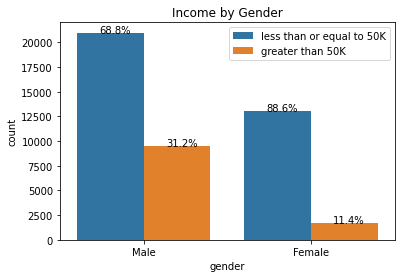

In [77]:
ax = sns.countplot(x='gender', data=df, hue='income')
plt.title('Income by Gender')
plt.legend(['less than or equal to 50K', 'greater than 50K'])
with_perc(ax, df['gender'] ,2,2)

In [14]:
df.gender.value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

There are twice as many males in this sample as females. When looking at the percentages out of total number of males, and total number of females seperately, you can see that 31% of males make over 50K but only 11% of females make over 50K.

## Age 

[Text(0, 0, '17'),
 Text(0, 0, '27'),
 Text(0, 0, '37'),
 Text(0, 0, '47'),
 Text(0, 0, '57'),
 Text(0, 0, '67'),
 Text(0, 0, '77'),
 Text(0, 0, '88')]

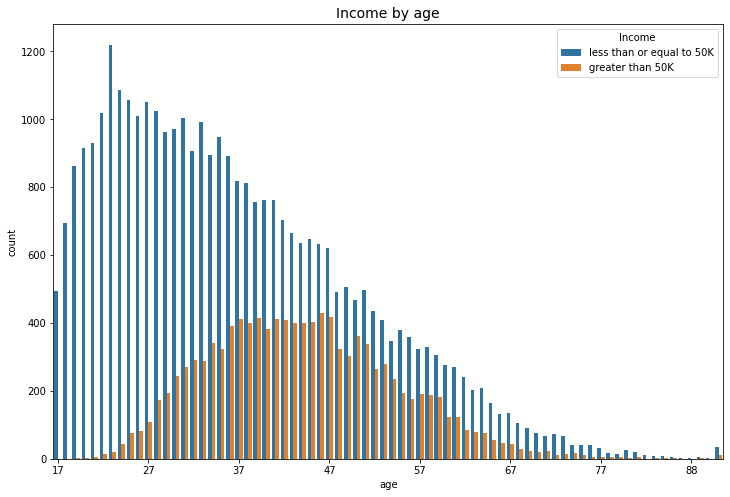

In [48]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'age', hue = 'income', data = df)
ax.legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')
ax.set_title('Income by age', loc='center', fontsize = 14)
ax.set_xticks(range(0, len(new_ticks), 10))
ax.set_xticklabels(new_ticks[::10])

## Occupation

<ipython-input-71-9f3bc07c00f5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


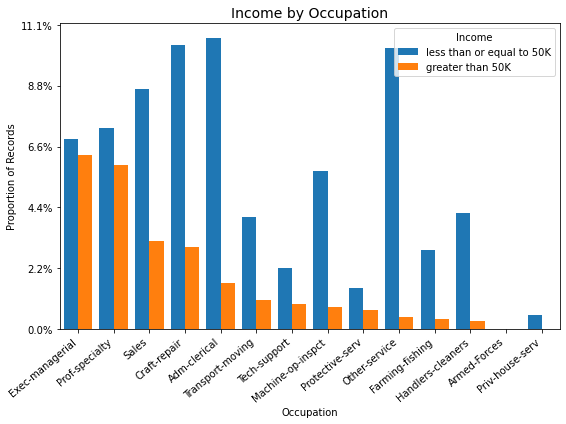

In [ ]:
# Use occupation percentage of '>50K' as order of the plot
order = (df.occupation[df.income==1].value_counts()/df.shape[0]).index

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'occupation', hue = 'income', order = order, data = df, saturation=1)
ax.set_title('Income by Occupation', fontsize = 14)
ax.set_xlabel("Occupation")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = df.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')

plt.tight_layout()
plt.show()

## Race

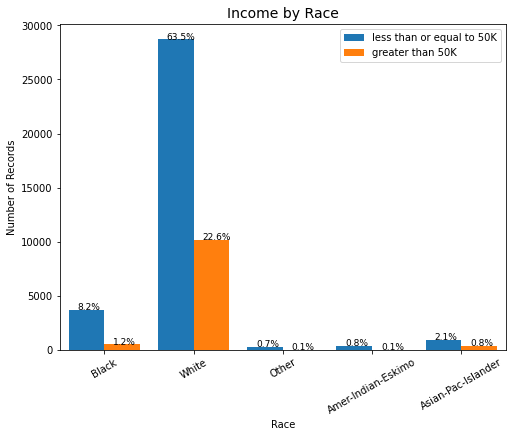

In [56]:
# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'race', hue = 'income', data = df,  saturation=1)
ax.set_title('Income by Race', fontsize = 14)
ax.legend(['less than or equal to 50K', 'greater than 50K'])
ax.set_xlabel('Race')
ax.set_ylabel('Number of Records')

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

with_perc(ax, df['race'] ,5,2)
    
plt.show()

In [70]:
df.race.value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [71]:
df[df['income']==1]['race'].value_counts()

White                 10207
Black                   534
Asian-Pac-Islander      369
Amer-Indian-Eskimo       53
Other                    45
Name: race, dtype: int64

It looks like approximately 28% of Asian Pacific Islanders, 26% of whites, and less than 15% of all other races make over 50K. Since 86% of the samples are white, the results for all other races may not be reliable. 

In [ ]:
total = len(df)
race = list(df["race"].value_counts().index.values)
counts = list(df["race"].value_counts().values)

race_dict = dict(zip(race, counts))
race_df = pd.DataFrame(race_dict, index=range(1)).T
race_df['% of total'] = race_df[0]/total*100
race_df

## Education

In [57]:
def with_perc_font(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100* a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 8)
    plt.show()

<Figure size 720x432 with 0 Axes>

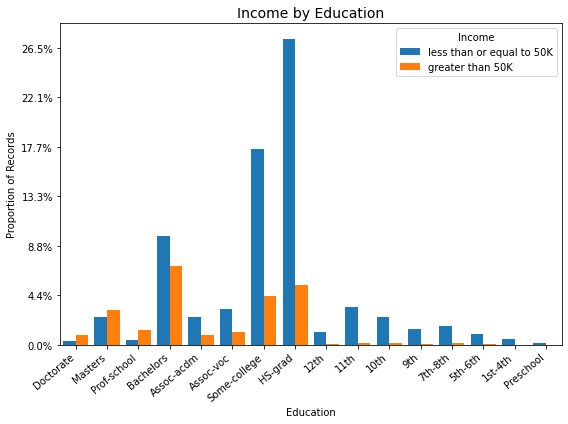

In [59]:
# Use occupation percentage of '>50K' as order of the plot
ordered = ['Doctorate', 'Masters', 'Prof-school', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'HS-grad', 
       '12th', '11th', '10th', '9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool']

plt.figure(figsize=(10,6))

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'education', hue = 'income', order = ordered, data = df, saturation=1)
ax.set_title('Income by Education', fontsize = 14)
ax.set_xlabel("Education")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = df.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(['less than or equal to 50K', 'greater than 50K'], loc=1, title='Income')

plt.tight_layout()
plt.show()

## Hours per week

Text(0, 0.5, 'Proportion of population')

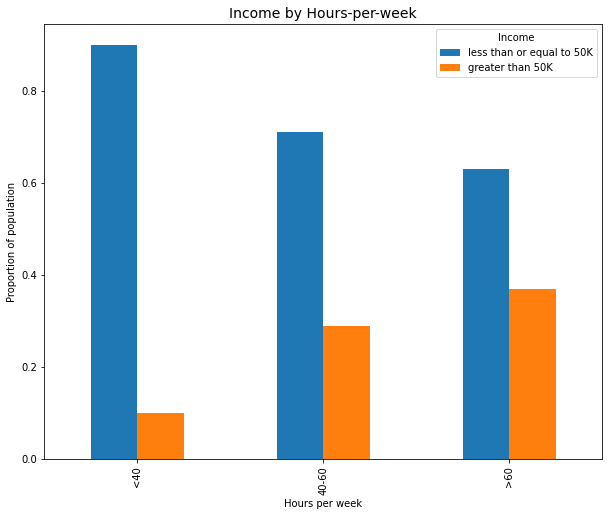

In [69]:
df['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in df['hours-per-week']]
df['hour_worked_bins'] = df['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(df.hour_worked_bins, df.income).div(pd.crosstab(df.hour_worked_bins, df.income).apply(sum,1),0),2)

hours_per_week.sort_values(by = 1, inplace = True)
ax = hours_per_week.plot(kind ='bar', figsize = (10,8))
ax.set_title('Income by Hours-per-week', fontsize = 14)
ax.legend(['less than or equal to 50K', 'greater than 50K'], loc=1, title='Income')
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

It appears that the more hours per week worked, the more likely you are to make over 50K.

## Combinations of columns

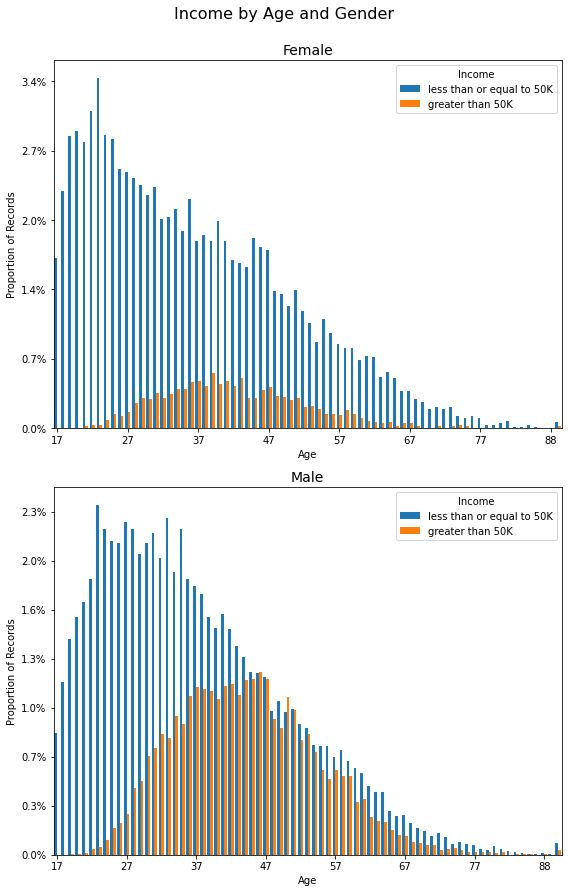

In [20]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))

# Initiate plot
sns.countplot(x = 'age', hue = 'income', data = df[df.gender=='Female'], saturation=1, ax=ax[0])
sns.countplot(x = 'age', hue = 'income', data = df[df.gender=='Male'], saturation=1, ax=ax[1])

# Add titles
ax[0].set_title('Female', loc='center', fontsize = 14)
ax[1].set_title('Male', loc='center', fontsize = 14)

# Add labels
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Proportion of Records")
ax[1].set_ylabel("Proportion of Records")

# Add x_axis ticks
new_ticks = [i.get_text() for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0, len(new_ticks), 10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0, len(new_ticks), 10))
ax[1].set_xticklabels(new_ticks[::10])

# Optimize y_axis ticks
total_F = df[df.gender=='Female'].shape[0]*1.
total_M = df[df.gender=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/total_F))
ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/total_M))

# Change legend location
ax[0].legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')
ax[1].legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')

# Set suptitle
fig.suptitle("Income by Age and Gender", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

In these graphs, you can see that the proportion of males making over 50K rises until the age of 47 when it remains high through retirement age. For females, the proportion rises through the age of 40 and then remains the same through retirement age. 

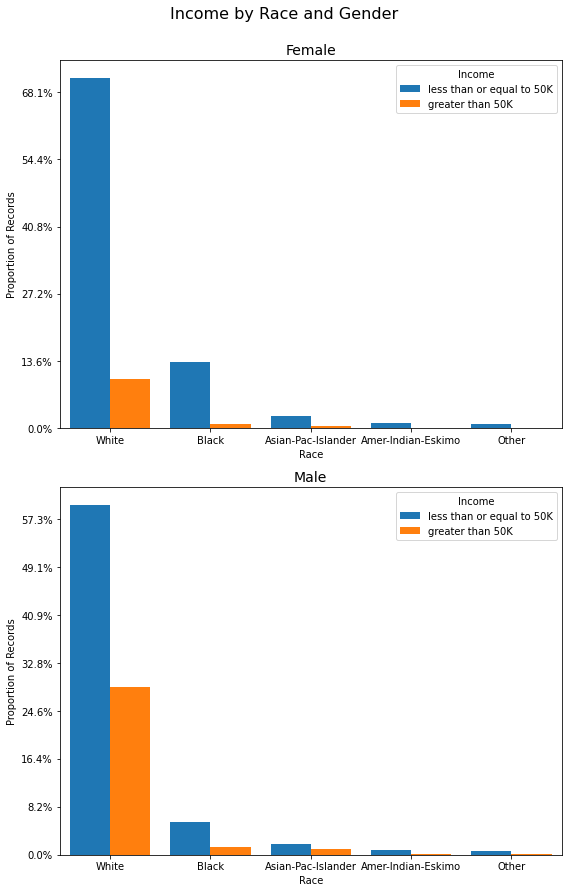

In [63]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))

order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

# Initiate plot
sns.countplot(x = 'race', hue = 'income', data = df[df.gender=='Female'], saturation=1, ax=ax[0], order=order)
sns.countplot(x = 'race', hue = 'income', data = df[df.gender=='Male'], saturation=1, ax=ax[1], order=order)

# Add titles
ax[0].set_title('Female', loc='center', fontsize = 14)
ax[1].set_title('Male', loc='center', fontsize = 14)

# Add labels
ax[0].set_xlabel("Race")
ax[1].set_xlabel("Race")
ax[0].set_ylabel("Proportion of Records")
ax[1].set_ylabel("Proportion of Records")



# Optimize y_axis ticks
total_F = df[df.gender=='Female'].shape[0]*1.
total_M = df[df.gender=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/total_F))
ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/total_M))

# Change legend location
ax[0].legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')
ax[1].legend(['less than or equal to 50K', 'greater than 50K'], loc='upper right', title='Income')

# Set suptitle
fig.suptitle("Income by Race and Gender", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

From these graphs, it appears that males of all races have higher proportions making over 50K.

## Summary

This data set has not been sampled evenly. The samples are approximately 65% male and 85% white. Knowing that the data is skewed, it does appear that gender, race, education, occupation, and the number of hours-per-week worked all impact whether someone will make over or under 50K per year. 

In further studies, it would be beneficial to have a more representative sample of the population.